In [1]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model

In [2]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/home/fabian/aistudy/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [3]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [11]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model(pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, 
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 200, class_mode = 'binary', 
                                                    target_size = (150, 150))     

validation_generator =  test_datagen.flow_from_directory( validation_dir, batch_size  = 100, class_mode  = 'binary', target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 10,
            epochs = 80,
            validation_steps = 10,
            verbose = 1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 10 steps, validate for 10 steps
Epoch 1/80
10/10 [==============================] - 13s 1s/step - loss: 0.4210 - accuracy: 0.8105 - val_loss: 0.3205 - val_accuracy: 0.9040
Epoch 2/80
10/10 [==============================] - 12s 1s/step - loss: 0.3211 - accuracy: 0.8525 - val_loss: 0.5406 - val_accuracy: 0.8710
Epoch 3/80
10/10 [==============================] - 13s 1s/step - loss: 0.3164 - accuracy: 0.8460 - val_loss: 0.3293 - val_accuracy: 0.9130
Epoch 4/80
10/10 [==============================] - 12s 1s/step - loss: 0.3368 - accuracy: 0.8490 - val_loss: 0.1454 - val_accuracy: 0.9580
Epoch 5/80
10/10 [==============================] - 12s 1s/step - loss: 0.2921 - accuracy: 0.8630 - val_loss: 0.2311 - val_accuracy: 0.9380
Epoch 6/80
10/10 [==============================] - 13s 1s/step - loss: 0.2805 - accuracy: 0.8780 - val_loss: 0.2732 - val_accuracy: 0.9330
Epoch 7/80
10/10 [==============================] - 12s 1s/step - lo

Epoch 58/80
10/10 [==============================] - 12s 1s/step - loss: 0.1630 - accuracy: 0.9310 - val_loss: 0.4263 - val_accuracy: 0.9440
Epoch 59/80
10/10 [==============================] - 12s 1s/step - loss: 0.1393 - accuracy: 0.9450 - val_loss: 0.5378 - val_accuracy: 0.9350
Epoch 60/80
10/10 [==============================] - 12s 1s/step - loss: 0.1411 - accuracy: 0.9430 - val_loss: 0.2904 - val_accuracy: 0.9550
Epoch 61/80
10/10 [==============================] - 12s 1s/step - loss: 0.1556 - accuracy: 0.9370 - val_loss: 0.6085 - val_accuracy: 0.9290
Epoch 62/80
10/10 [==============================] - 12s 1s/step - loss: 0.1459 - accuracy: 0.9430 - val_loss: 0.4093 - val_accuracy: 0.9470
Epoch 63/80
10/10 [==============================] - 12s 1s/step - loss: 0.1666 - accuracy: 0.9345 - val_loss: 0.9129 - val_accuracy: 0.9100
Epoch 64/80
10/10 [==============================] - 12s 1s/step - loss: 0.1533 - accuracy: 0.9385 - val_loss: 0.5043 - val_accuracy: 0.9370
Epoch 65/80
1

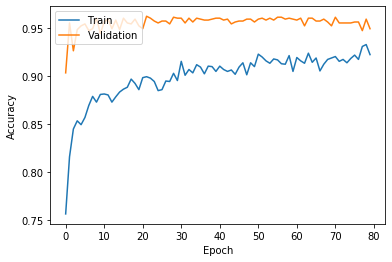

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

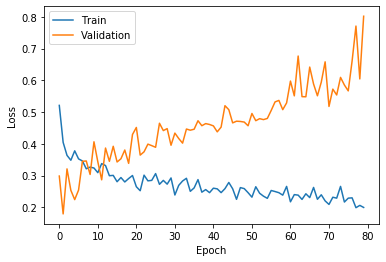

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()